# Introduction to tensor slicing

When working on ML applications such as object detection and NLP, it is sometimes necessary to work with sub-sections (slices) of tensors. For example, if your model architecture includes routing, where one layer might control which training example gets routed to the next layer. In this case, you could use tensor slicing ops to split the tensors up and put them back together in the right order.

In NLP applications, you can use tensor slicing to perform word masking while training. For example, you can generate training data from a list of sentences by choosing a word index to mask in each sentence, taking the word out as a label, and then replacing the chosen word with a mask token.  

In this guide, you will learn how to use the TensorFlow APIs to:

* Extract slices from a tensor
* Insert data at specific indices in a tensor

This guide assumes familiarity with tensor indexing. Read the indexing sections of the [Tensor](https://www.tensorflow.org/guide/tensor#indexing) and [TensorFlow NumPy](https://www.tensorflow.org/guide/tf_numpy#indexing) guides before getting started with this guide.

## Setup


In [1]:
import tensorflow as tf
import numpy as np

## Extract tensor slices

Perform NumPy-like tensor slicing using `tf.slice`.


In [2]:
t1 = tf.constant([0, 1, 2, 3, 4, 5, 6, 7])

print(tf.slice(t1,
               begin=[1],
               size=[3]))

# resultant tensor is a 1 dimensional tensor with 3 elements.
# In 1D, shape is the number of elements.

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


2023-02-27 14:09:51.321750: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Alternatively, you can use a more Pythonic syntax. Note that tensor slices are evenly spaced over a start-stop range.

In [3]:
print(t1[1:4])

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


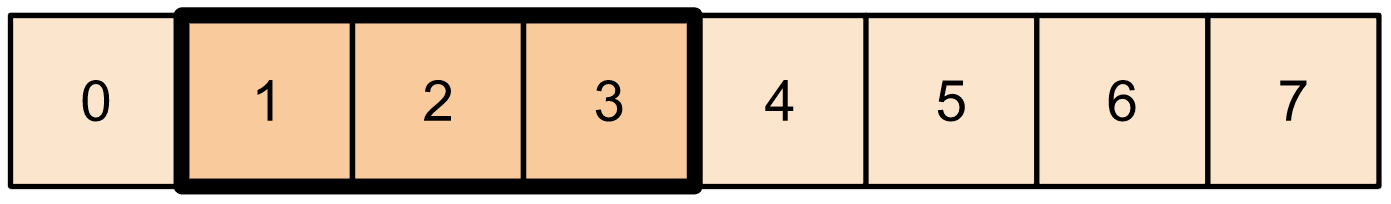

<img src="images/tf_slicing/slice_1d_1.png">

In [4]:
print(t1[-3:])

tf.Tensor([5 6 7], shape=(3,), dtype=int32)


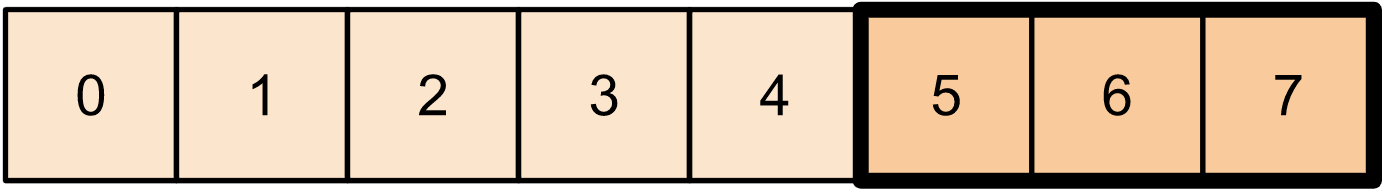

For 2-dimensional tensors,you can use something like:

In [5]:
t2 = tf.constant([[0, 1, 2, 3, 4],
                  [5, 6, 7, 8, 9],
                  [10,11,12,13,14],
                  [15,16,17,18,19]])
t2

<tf.Tensor: shape=(4, 5), dtype=int32, numpy=
array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]], dtype=int32)>

In [6]:
t2.shape

TensorShape([4, 5])

In [7]:
print(t2[:-1, 1:3])

tf.Tensor(
[[ 1  2]
 [ 6  7]
 [11 12]], shape=(3, 2), dtype=int32)


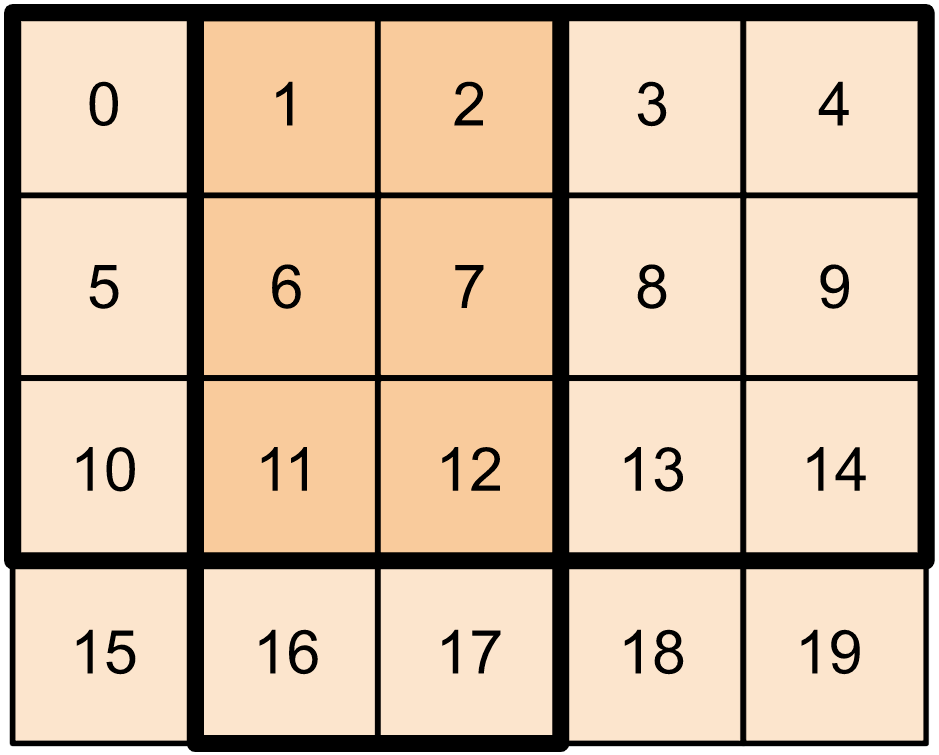

You can use `tf.slice` on higher dimensional tensors as well.

In [8]:
t3 = tf.constant([[[1, 3, 5, 7],
                   [9, 11,13,15]],
                  [[17,19,21,23],
                   [25,27,29,31]]
                  ])
t3

<tf.Tensor: shape=(2, 2, 4), dtype=int32, numpy=
array([[[ 1,  3,  5,  7],
        [ 9, 11, 13, 15]],

       [[17, 19, 21, 23],
        [25, 27, 29, 31]]], dtype=int32)>

In [9]:
t3.shape


TensorShape([2, 2, 4])

In [10]:
print(tf.slice(t3,
               begin=[1, 1, 0],
               size=[1, 1, 2]))

tf.Tensor([[[25 27]]], shape=(1, 1, 2), dtype=int32)


In [11]:
print(tf.slice(t3,
               begin=[1, 1, 0],
               size=[1, 1, 3]))

tf.Tensor([[[25 27 29]]], shape=(1, 1, 3), dtype=int32)


Extracting same result using normal pythonic syntax-

In [12]:
t3

<tf.Tensor: shape=(2, 2, 4), dtype=int32, numpy=
array([[[ 1,  3,  5,  7],
        [ 9, 11, 13, 15]],

       [[17, 19, 21, 23],
        [25, 27, 29, 31]]], dtype=int32)>

In [13]:
t3[1,1,0:2]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([25, 27], dtype=int32)>

You can also use `tf.strided_slice` to extract slices of tensors by 'striding' over the tensor dimensions.

Use `tf.gather` to extract specific indices from a single axis of a tensor.

In [14]:
t1

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)>

### tf.gather

tf.gather is a part of tensorflow while the slicing and indexing operator which can also achieve same task as tf.gather are core python commands.

In case of tf.gather it is not necessary to follow a particular movement e.g. indices=[2, 0, 19, 18]) is valid (in any order) while in case of slicing you the movement will be either left to right or right to left depending on stride/step (if 1 then left to right (default), if -1 then from right to left).

In [15]:
print(tf.gather(t1,
                indices=[0, 3, 6]))


tf.Tensor([0 3 6], shape=(3,), dtype=int32)


In [16]:
# This is similar to doing

t1[::3]   # using step size of 3

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 3, 6], dtype=int32)>

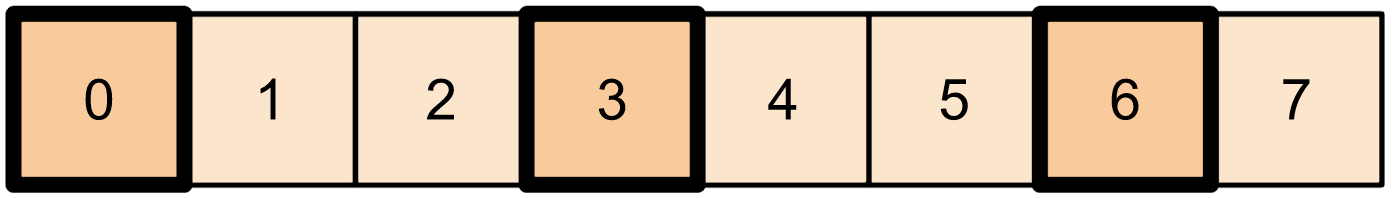

<img src="images/tf_slicing/slice_1d_3.png">

`tf.gather` does not require indices to be evenly spaced.

In [17]:
alphabet = tf.constant(list('abcdefghijklmnopqrstuvwxyz'))

print(tf.gather(alphabet,
                indices=[2, 0, 19, 18]))

tf.Tensor([b'c' b'a' b't' b's'], shape=(4,), dtype=string)


Below we jumbled the words and created some meaning out of it or can also be used in string matching etc

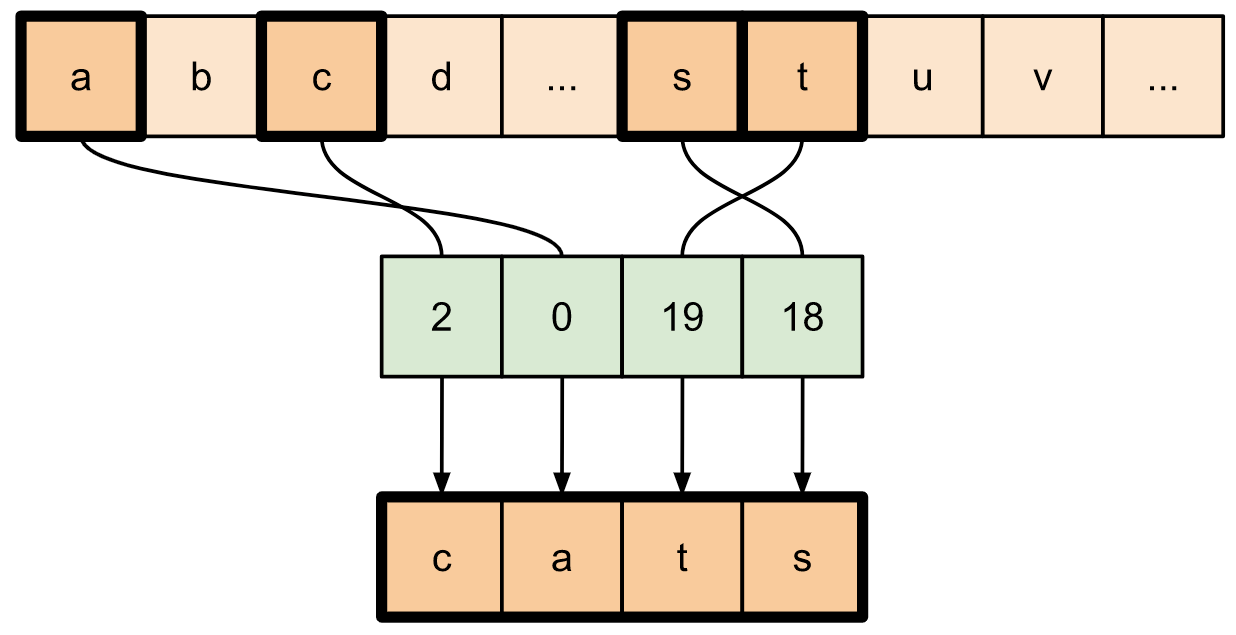

To extract slices from multiple axes of a tensor, use `tf.gather_nd`. This is useful when you want to gather the elements of a matrix as opposed to just its rows or columns.

In [18]:
t4 = tf.constant([[0, 5],
                  [1, 6],
                  [2, 7],
                  [3, 8],
                  [4, 9]])

print(tf.gather_nd(t4,
                   indices=[[2], [3], [0]]))

tf.Tensor(
[[2 7]
 [3 8]
 [0 5]], shape=(3, 2), dtype=int32)


In [19]:
t4.shape

TensorShape([5, 2])

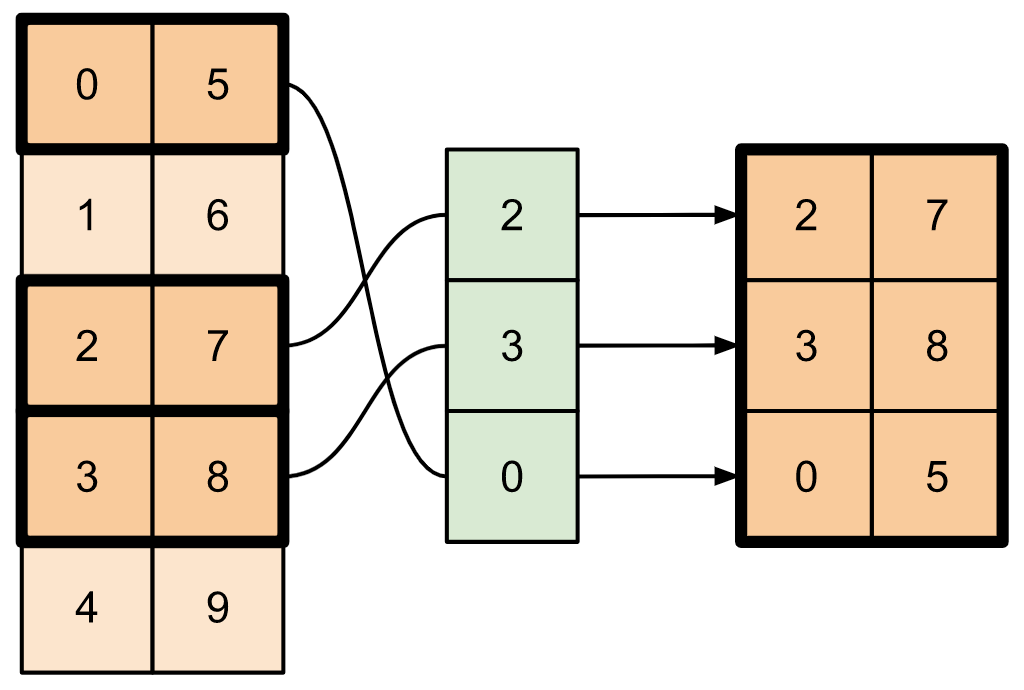

In [20]:
t5 = np.arange(18)
t5

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [21]:
t5.shape

(18,)

In [22]:
t5 = np.reshape(t5, [2,3,3])
t5

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]]])

In 1 step u can do arrange as well as reshape as below-

In [23]:
t5 = np.reshape(np.arange(18), [2, 3, 3])
t5

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]]])

For extraction of elements as well the order remains the same, planes, rows and columns

In [24]:
print(tf.gather_nd(t5,
                   indices=[[0, 0, 0], [1, 2, 1]]))      # plane, row, column

tf.Tensor([ 0 16], shape=(2,), dtype=int64)


In [25]:
# Return a list of two matrices

print(tf.gather_nd(t5,
                   indices=[[[0, 0], [0, 2]], [[1, 0], [1, 2]]]))   

## Notation for extraction remains same - planes, rows, columns

tf.Tensor(
[[[ 0  1  2]
  [ 6  7  8]]

 [[ 9 10 11]
  [15 16 17]]], shape=(2, 2, 3), dtype=int64)


In [26]:
# Return one matrix

print(tf.gather_nd(t5,
                   indices=[[0, 0], [0, 2], [1, 0], [1, 2]]))

## Notation for extraction remains same - planes, rows, columns

tf.Tensor(
[[ 0  1  2]
 [ 6  7  8]
 [ 9 10 11]
 [15 16 17]], shape=(4, 3), dtype=int64)


## Insert data into tensors

**Use `tf.scatter_nd` to insert data at specific slices/indices of a tensor. Note that the tensor into which you insert values is zero-initialized.**

In [27]:
t6 = tf.constant([10])
print(t6.shape)
print(t6)
indices = tf.constant([[1], [3], [5], [7], [9]])
data = tf.constant([2, 4, 6, 8, 10])

print(tf.scatter_nd(indices=indices,
                    updates=data,
                    shape=t6))

(1,)
tf.Tensor([10], shape=(1,), dtype=int32)
tf.Tensor([ 0  2  0  4  0  6  0  8  0 10], shape=(10,), dtype=int32)


Since the tensor into which we insert values is 0 initialized, hence all remaining places where no index specified we get 0's.

#### Methods like `tf.scatter_nd` which require zero-initialized tensors are similar to sparse tensor initializers. You can use `tf.gather_nd` and `tf.scatter_nd` to mimic the behavior of sparse tensor ops.

##### Consider an example where you construct a sparse tensor using these two methods in conjunction.

In [28]:
t2

<tf.Tensor: shape=(4, 5), dtype=int32, numpy=
array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]], dtype=int32)>

In [29]:
# Gather values from one tensor by specifying indices

new_indices = tf.constant([[0, 2], [2, 1], [3, 3]])
t7 = tf.gather_nd(t2, indices=new_indices)

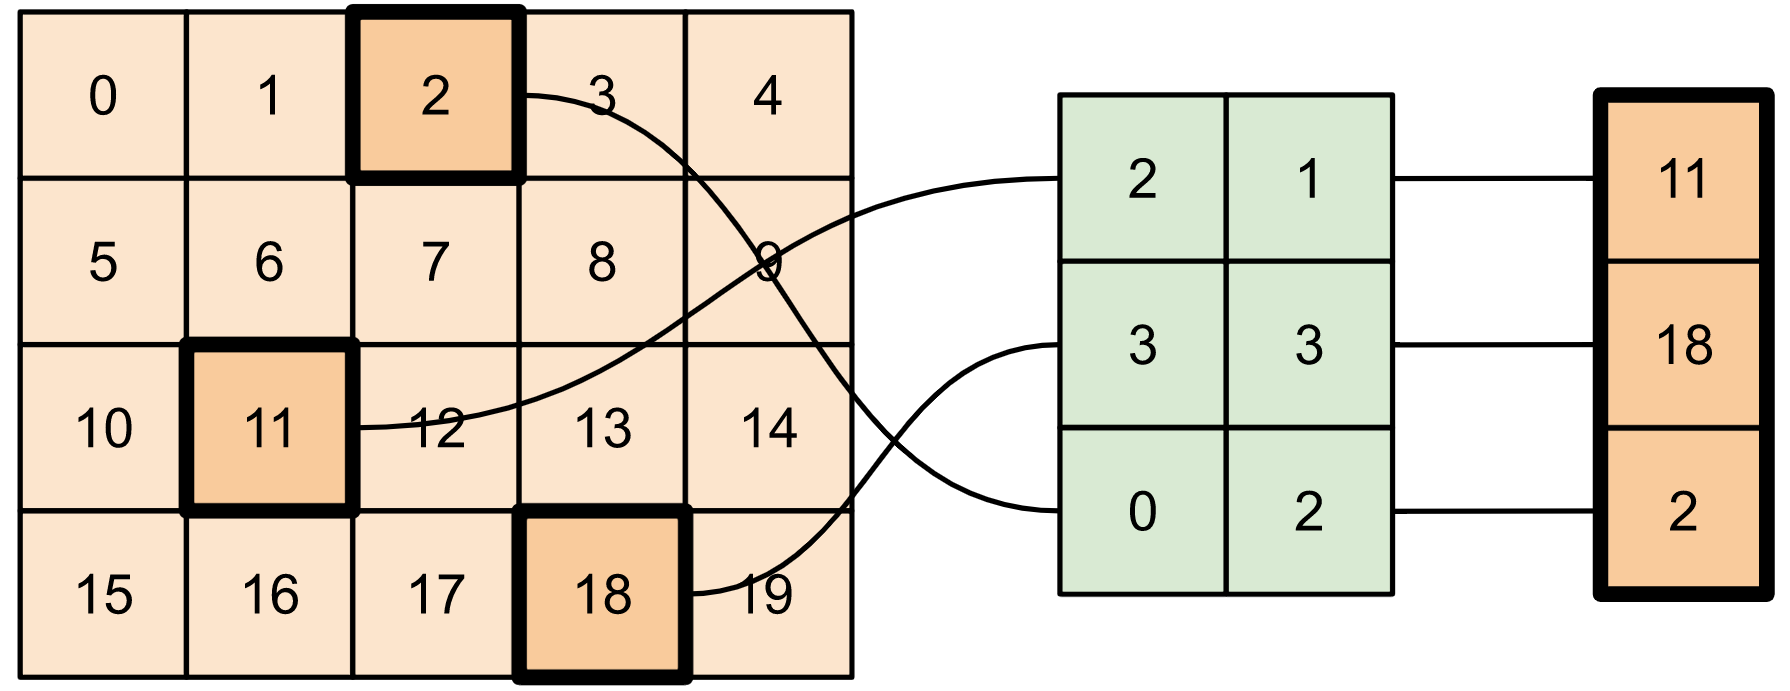

In [30]:
t7

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 2, 11, 18], dtype=int32)>

In [31]:
t7.shape

TensorShape([3])

In [32]:
# Add these values into a new tensor

t8 = tf.scatter_nd(indices=new_indices, updates=t7, shape=tf.constant([4, 5]))

print(t8)  

# Since 0 initialized tensor in which we insert hence no index specifies are 
# all 0 values

tf.Tensor(
[[ 0  0  2  0  0]
 [ 0  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0  0 18  0]], shape=(4, 5), dtype=int32)


This is similar to:

In [33]:
t9 = tf.SparseTensor(indices=[[0, 2], [2, 1], [3, 3]],
                     values=[2, 11, 18],
                     dense_shape=[4, 5])

print(t9)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [2 1]
 [3 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([ 2 11 18], shape=(3,), dtype=int32), dense_shape=tf.Tensor([4 5], shape=(2,), dtype=int64))


In [34]:
# Convert the sparse tensor into a dense tensor

t10 = tf.sparse.to_dense(t9)   # In sparse only index and value r stored
                               # In dense can see whole actual matrix with 0's
print(t10)

tf.Tensor(
[[ 0  0  2  0  0]
 [ 0  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0  0 18  0]], shape=(4, 5), dtype=int32)


### Updating Tensors

To insert data into a tensor with pre-existing values, use `tf.tensor_scatter_nd_add`.

- tf.tensor_scatter_nd_add
- tf.tensor_scatter_nd_sub
- tf.tensor_scatter_nd_min
- tf.tensor_scatter_nd_max

`tf.tensor_scatter_nd_add` is adding to existing values and then updating.

In [35]:
t11 = tf.constant([[2, 7, 0],
                   [9, 0, 1],
                   [0, 3, 8]])

# Convert the tensor into a magic square by inserting numbers at appropriate indices

t12 = tf.tensor_scatter_nd_add(t11,
                               indices=[[0, 2], [1, 1], [2, 0]],
                               updates=[6, 5, 4])

print(t12)

tf.Tensor(
[[2 7 6]
 [9 5 1]
 [4 3 8]], shape=(3, 3), dtype=int32)


Similarly, use `tf.tensor_scatter_nd_sub` to subtract values from a tensor with pre-existing values.

In [36]:
# Convert the tensor into an identity matrix


print(t11)

t13 = tf.tensor_scatter_nd_sub(t11,
                               indices=[[0, 0], [0, 1], [1, 0], [1, 1], [1, 2], [2, 1], [2, 2]],
                               updates=[1, 7, 9, -1, 1, 3, 7])

print(t13)


tf.Tensor(
[[2 7 0]
 [9 0 1]
 [0 3 8]], shape=(3, 3), dtype=int32)
tf.Tensor(
[[1 0 0]
 [0 1 0]
 [0 0 1]], shape=(3, 3), dtype=int32)


Use `tf.tensor_scatter_nd_min` to copy element-wise minimum values from one tensor to another.

In [37]:
t14 = tf.constant([[-2, -7, 0],
                   [-9, 0, 1],
                   [0, -3, -8]])

t15 = tf.tensor_scatter_nd_min(t14,
                               indices=[[0, 2], [1, 1], [2, 0]],
                               updates=[-6, -5, -4])

print(t15)

tf.Tensor(
[[-2 -7 -6]
 [-9 -5  1]
 [-4 -3 -8]], shape=(3, 3), dtype=int32)


Similarly, use `tf.tensor_scatter_nd_max` to copy element-wise maximum values from one tensor to another.

In [38]:
print(t14)

t16 = tf.tensor_scatter_nd_max(t14,
                               indices=[[0, 2], [1, 1], [2, 0]],
                               updates=[6, 5, 4])

print(t16)

tf.Tensor(
[[-2 -7  0]
 [-9  0  1]
 [ 0 -3 -8]], shape=(3, 3), dtype=int32)
tf.Tensor(
[[-2 -7  6]
 [-9  5  1]
 [ 4 -3 -8]], shape=(3, 3), dtype=int32)


In [39]:
import tensorflow as tf

# Define the input tensor and indices
input_tensor = tf.constant([[1, 2], [3, 4]])
print(input_tensor)
indices = tf.constant([[0, 0], [1, 1]])


# Define the updates tensor
updates = tf.constant([9, 5])

# Use tf.tensor_scatter_nd_max() to update the input tensor
output_tensor = tf.tensor_scatter_nd_max(input_tensor, indices, updates)

# Print the output tensor
print(output_tensor)


tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[9 2]
 [3 5]], shape=(2, 2), dtype=int32)


## Further reading and resources

In this guide, you learned how to use the tensor slicing ops available with TensorFlow to exert finer control over the elements in your tensors.

* Check out the slicing ops available with TensorFlow NumPy such as `tf.experimental.numpy.take_along_axis` and `tf.experimental.numpy.take`.

* Also check out the [Tensor guide](https://www.tensorflow.org/guide/tensor) and the [Variable guide](https://www.tensorflow.org/guide/variable).